<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/023_K%20Means%20Clustering/023_KMeans%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Module 23 Practice Notebook: K-Means Clustering

This notebook is for **student practice**.

### Objectives
- Practice implementing K-Means step by step
- Understand the role of scaling
- Use Elbow Method to choose k
- Interpret clustering results

**Instructions:**
- Do NOT skip TODOs
- Run cells in order
- Write your code only where TODO is mentioned

---


## 🔹 Section 1: Import Necessary Libraries

**TODO:** Import all required libraries for K-Means clustering.

Hint:
- numpy, pandas
- matplotlib, seaborn
- KMeans, StandardScaler


In [58]:
# TODO: Write your import statements here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 🔹 Section 2: Load the Dataset

We will use a **customer behavior dataset**.

Features:
- Annual Income (k$)
- Spending Score (1–100)


In [59]:
# Dataset source (do not change)
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv"

# TODO: Load the dataset using pandas and store it in df
df = pd.read_csv(url)

## 🔹 Section 3: Explore the Dataset

**TODO:**
- Display first 5 rows
- Check dataset shape
- Check column names


In [60]:
# TODO: Explore the dataset
print(df.head())
print(df.shape)
print(df.columns)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


## 🔹 Section 4: Select Features for Clustering

We will use only numeric features:
- Annual Income (k$)
- Spending Score (1-100)

**TODO:** Create feature matrix X.


In [61]:
# TODO: Select the two features and store in X
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 🔹 Section 5: Feature Scaling

K-Means uses distance.

**TODO:**
- Create a StandardScaler
- Fit and transform X
- Store scaled data in X_scaled


In [62]:
# TODO: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔹 Section 6: Elbow Method (Choosing k)

**TODO:**
- Run K-Means for k = 1 to 10
- Store inertia values
- Plot k vs inertia


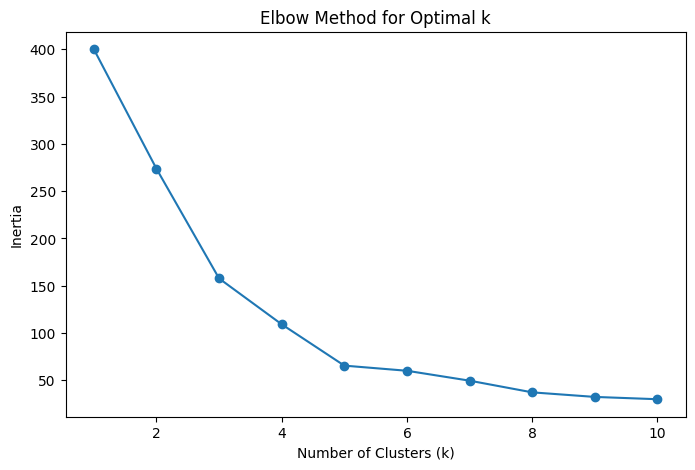

In [63]:
# TODO: Implement the Elbow Method
inertia_values = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k, init="k-means++", random_state=42)
  km.fit(X_scaled)
  inertia_values.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia_values, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

## 🔹 Section 7: Apply K-Means Clustering

Choose k based on the Elbow plot.

**TODO:**
- Create KMeans model
- Fit on X_scaled
- Get cluster labels


In [64]:
# TODO: Fit K-Means and get labels
k = 5
kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    max_iter=300,
    random_state=42
)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df["cluster"]=labels
labels[:150]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1], dtype=int32)

## 🔹 Section 8: Visualize the Clusters

**TODO:**
- Add cluster labels to dataframe
- Create a scatter plot
- Color points by cluster


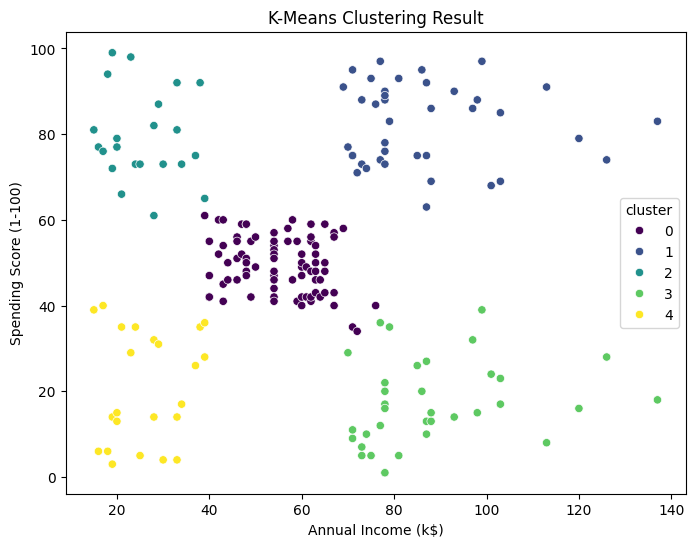

In [65]:
# TODO: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["cluster"],
    palette="viridis"
)

plt.title("K-Means Clustering Result")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## 🔹 Section 9: Evaluate Clustering (Silhouette Score)

**TODO:**
- Calculate silhouette score
- Print the score
- Comment on the quality


In [66]:
# TODO: Compute silhouette score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


## 🔹 Section 10: Reflection Questions

Answer in markdown (write below):

1. Why is scaling mandatory for K-Means?
2. What happens if k is chosen too large?
3. Is K-Means suitable for all datasets? Why or why not?


**1.**
Scaling is mandatory for K-Means because it uses distance (Euclidean distance) to form clusters, and features with larger scales would otherwise dominate the distance calculation. Standardizing ensures all features contribute equally to clustering.

**2.**
If k is chosen too large, K-Means creates too many clusters, causing overfitting where clusters capture noise and split natural groups into meaningless smaller clusters.

**3.**
No, K-Means is not suitable for all datasets because it assumes spherical, equally sized clusters and is sensitive to outliers and scale. It also performs poorly when clusters have irregular shapes, different densities or when the true number of clusters is unclear.